In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Synthetic data
np.random.seed(42)
X_synthetic = np.linspace(0, 10, 50).reshape(-1, 1)
y_synthetic = 2 * X_synthetic + 1 + np.random.normal(0, 1, 50)

# Normalize synthetic data
scaler = StandardScaler()
X_synthetic_normalized = scaler.fit_transform(X_synthetic)

print("Synthetic Design Matrix (first 5 rows):\n", X_synthetic_normalized[:5])

# Real data: California Housing
housing = fetch_california_housing()
X_california = housing.data[:, [0, 1]]  # Features: MedInc, HouseAge
y_california = housing.target

X_california_normalized = scaler.fit_transform(X_california)
print("\nCalifornia Housing Design Matrix (first 5 rows):\n", X_california_normalized[:5])

# Solution to question
'''How does normalization affect the feature values?
Normalization transforms feature values to have zero mean and unit variance,
which ensures all features contribute equally to the learning process and improves the
convergence of gradient descent.'''

Synthetic Design Matrix (first 5 rows):
 [[-1.69774938]
 [-1.62845348]
 [-1.55915759]
 [-1.4898617 ]
 [-1.4205658 ]]

California Housing Design Matrix (first 5 rows):
 [[ 2.34476576  0.98214266]
 [ 2.33223796 -0.60701891]
 [ 1.7826994   1.85618152]
 [ 0.93296751  1.85618152]
 [-0.012881    1.85618152]]


'How does normalization affect the feature values?\nNormalization transforms feature values to have zero mean and unit variance,\nwhich ensures all features contribute equally to the learning process and improves the\nconvergence of gradient descent.'

In [7]:
def predict(X, w, b):
    return X * w + b

def compute_mse(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def compute_mae(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

# Try different (w, b) values
params = [(1.5, 0.5), (2.0, 1.0), (1.0, 2.0)]
for w, b in params:
    y_pred = predict(X_synthetic, w, b)
    mse = compute_mse(y_pred, y_synthetic)
    mae = compute_mae(y_pred, y_synthetic)
    print(f"(w={w}, b={b}) -> MSE: {mse:.3f}, MAE: {mae:.3f}")
'''
Why does MSE penalize larger errors more than MAE?
MSE squares the error, so larger errors are weighted more heavily,
making the model more sensitive to outliers compared to MAE.
'''

(w=1.5, b=0.5) -> MSE: 10.721, MAE: 2.828
(w=2.0, b=1.0) -> MSE: 0.905, MAE: 0.766
(w=1.0, b=2.0) -> MSE: 23.775, MAE: 4.028


'\nWhy does MSE penalize larger errors more than MAE?\nMSE squares the error, so larger errors are weighted more heavily,\nmaking the model more sensitive to outliers compared to MAE.\n'

Optimized w: -522948218878928868627412982705099629631087886378734150447210753310594322838162175055109300641641059639578310074065378671893273781391151041899580981510144.000, b: -78235321364240492387453282944087694771590170104899422142320424098679718132252443674306779580704176628413453380751748604669762315464886934000932321492992.000, Final MSE: 8616053291357479373430864488808144012320016932210390680679626840944640076253347122812907828802158242082275045473881701957510536712301887974204506646447335768006018795049636165721851352145210782231325501063965329214326655694928295948034706777219530393743521579160376973940141490853270090009261442345205760.000


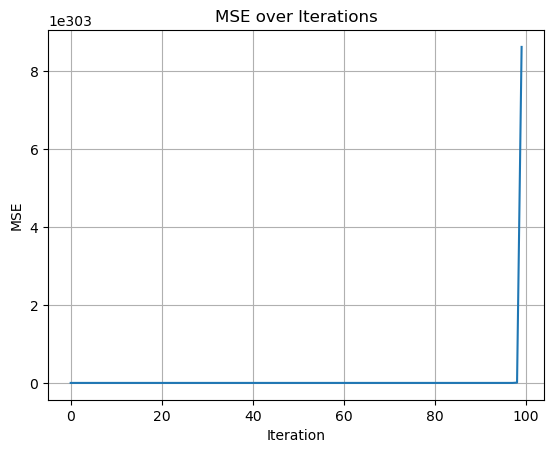

In [8]:
# Gradient Descent Implementation
w, b = 0.0, 0.0
learning_rate = 0.01
m = len(X_synthetic)
mse_history = []

for i in range(100):
    y_pred = predict(X_synthetic, w, b)
    error = y_pred - y_synthetic
    dw = (2 / m) * np.sum(error * X_synthetic)
    db = (2 / m) * np.sum(error)
    
    w -= learning_rate * dw
    b -= learning_rate * db
    
    mse = compute_mse(y_pred, y_synthetic)
    mse_history.append(mse)

print(f"Optimized w: {w:.3f}, b: {b:.3f}, Final MSE: {mse_history[-1]:.3f}")

# Plot
plt.plot(mse_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Iterations")
plt.grid(True)
plt.show()


Test MSE: 0.749, Test MAE: 0.606


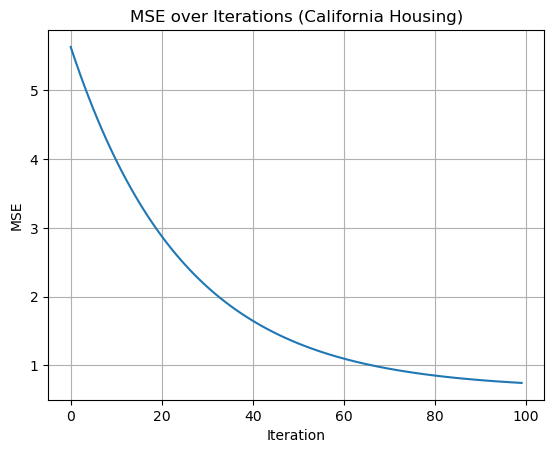

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_california_normalized, y_california, test_size=0.2, random_state=42)

# Initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0.0
learning_rate = 0.01
epochs = 100

mse_history = []

for _ in range(epochs):
    y_pred = X_train @ w + b
    error = y_pred - y_train
    dw = (2 / len(X_train)) * X_train.T @ error
    db = (2 / len(X_train)) * np.sum(error)
    
    w -= learning_rate * dw
    b -= learning_rate * db
    
    mse = np.mean((y_pred - y_train) ** 2)
    mse_history.append(mse)

# Evaluate on test set
y_test_pred = X_test @ w + b
mse_test = np.mean((y_test_pred - y_test) ** 2)
mae_test = np.mean(np.abs(y_test_pred - y_test))

print(f"Test MSE: {mse_test:.3f}, Test MAE: {mae_test:.3f}")

# Plot
plt.plot(mse_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Iterations (California Housing)")
plt.grid(True)
plt.show()
